Regression: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption


Classification:https://archive.ics.uci.edu/ml/datasets/Census+Income



1.	Data ingestion
2.	EDA
3.	Preprocessing
Pickling for the preprocessing object(save the preprocessing model)
After preprocessing you have to store data inside MONGODB

You have to load the data from mongo db
4.	Model

Regression:linear regression,ridge regression,lasso regression,elastic net, support vector regression

Classification: logistic regression,SVM(kernel)

Hyperparameter tuning is mandatory(GRID SEARCH CV)

5.	Evaluation of the model
Regression evaluation matrix: R2 and adjusted R2
Classification confusion matrix, ROC AUC score


Submission form link: https://forms.gle/2PJSSCmL9S865nwe8

Deadline till saturday 12AM IST

USE IDE: jupyter notebook


In [9]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold # use for cross validation


In [14]:
#import the data
df=pd.read_csv("C:\\Users\\prash\\Downloads\\individual+household+electric+power+consumption\\household_power_consumption.txt",sep=';',
               parse_dates={'dt':['Date','Time']},infer_datetime_format=True,low_memory=False,na_values=['nan','?'],index_col='dt')
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [15]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [ ]:
#converted the date and time to index -time series type,  data incluse nan ? as a string now both of them are na_values

In [16]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [19]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [20]:
df.shape

(2075259, 7)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2049280.0,1.091615,1.057294,0.076,0.308,0.602,1.528,11.122
Global_reactive_power,2049280.0,0.123714,0.112722,0.000,0.048,0.100,0.194,1.390
Voltage,2049280.0,240.839858,3.239987,223.200,238.990,241.010,242.890,254.150
Global_intensity,2049280.0,4.627759,4.444396,0.200,1.400,2.600,6.400,48.400
Sub_metering_1,2049280.0,1.121923,6.153031,0.000,0.000,0.000,0.000,88.000
Sub_metering_2,2049280.0,1.298520,5.822026,0.000,0.000,0.000,1.000,80.000
Sub_metering_3,2049280.0,6.458447,8.437154,0.000,0.000,1.000,17.000,31.000


In [24]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [30]:
for i in range(1,7):
    print(df.iloc[:,i].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

In [31]:
#now deal with the missing values

In [34]:
#finding all columns with nan values
dropping_list_all=[]
for i in range(0,7):
    if not df.iloc[:,i].notnull().all():
        dropping_list_all.append(i)
dropping_list_all
    

[0, 1, 2, 3, 4, 5, 6]

In [35]:
#finding all nan values with mean in any columns
for i in range(0,7):
    df.iloc[:,i]=df.iloc[:,j].fillna(df.iloc[:,i].mean())

In [39]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [41]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.358311e-01,1.237145e-01,1.237145e-01,1.237145e-01,1.237145e-01,1.237145e-01,1.237145e-01
std,1.553320e-01,1.120142e-01,1.120142e-01,1.120142e-01,1.120142e-01,1.120142e-01,1.120142e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.800000e-02,4.800000e-02,4.800000e-02,4.800000e-02,4.800000e-02,4.800000e-02,4.800000e-02
50%,1.020000e-01,1.020000e-01,1.020000e-01,1.020000e-01,1.020000e-01,1.020000e-01,1.020000e-01
75%,1.980000e-01,1.920000e-01,1.920000e-01,1.920000e-01,1.920000e-01,1.920000e-01,1.920000e-01
max,1.390000e+00,1.390000e+00,1.390000e+00,1.390000e+00,1.390000e+00,1.390000e+00,1.390000e+00


In [42]:
df['Global_active_power'].resample('M').sum()

dt
2006-12-31     2893.802460
2007-01-31     5924.579230
2007-02-28     4583.791230
2007-03-31     5123.275615
2007-04-30     8753.076781
2007-05-31     5148.894000
2007-06-30     6364.919447
2007-07-31     5817.063570
2007-08-31     5057.659531
2007-09-30     5445.599230
2007-10-31     4173.353230
2007-11-30     4173.087230
2007-12-31     4951.575615
2008-01-31     3909.329615
2008-02-29     3642.962845
2008-03-31     4532.557615
2008-04-30     5361.760000
2008-05-31     6898.771230
2008-06-30     6551.529615
2008-07-31     6553.629230
2008-08-31     5707.229230
2008-09-30     5399.154000
2008-10-31     4759.841447
2008-11-30     4387.478535
2008-12-31     4148.462668
2009-01-31     4397.617615
2009-02-28     3928.157362
2009-03-31     4659.577230
2009-04-30     5316.771230
2009-05-31     5342.102460
2009-06-30     9037.287696
2009-07-31     7492.336460
2009-08-31     9216.060998
2009-09-30     6651.336845
2009-10-31     5867.489615
2009-11-30     5475.029615
2009-12-31     5794.07123

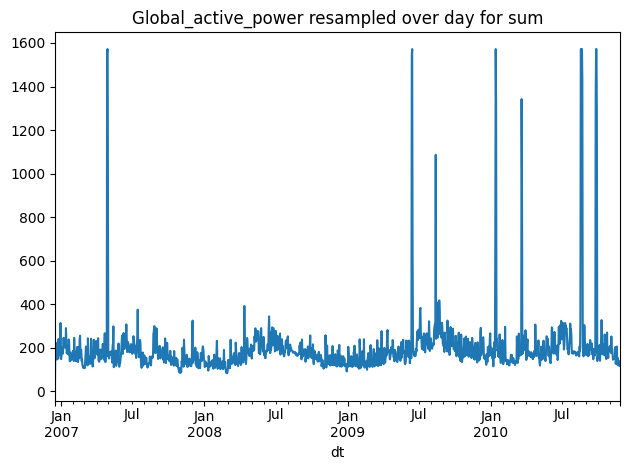

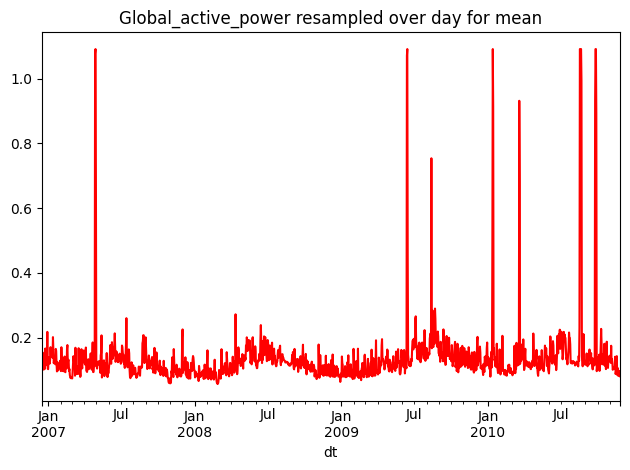

In [49]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

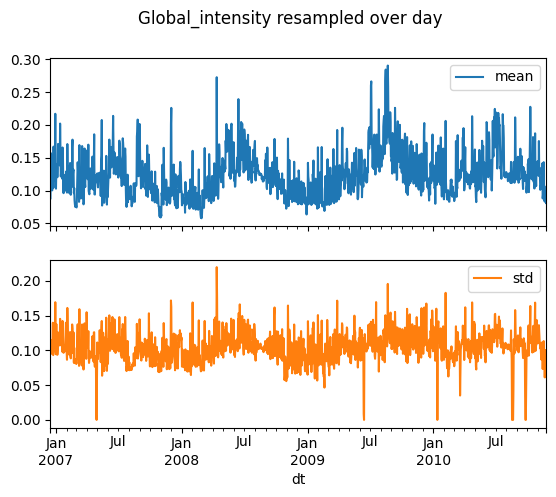

In [52]:
#lets check global intensity resampled over day
r=df.Global_intensity.resample('D').agg(['mean','std'])
r.plot(subplots=True,title='Global_intensity resampled over day')
plt.show()

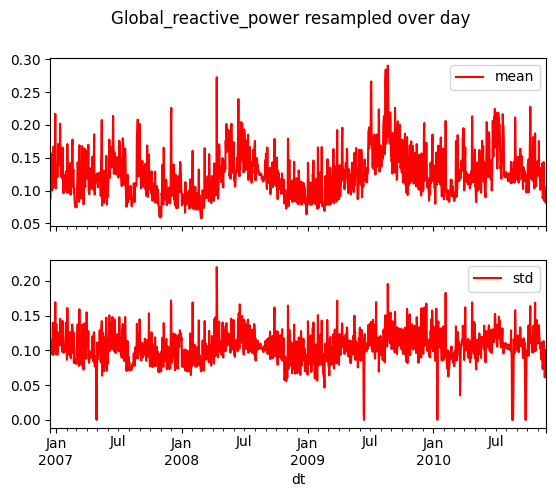

In [53]:
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

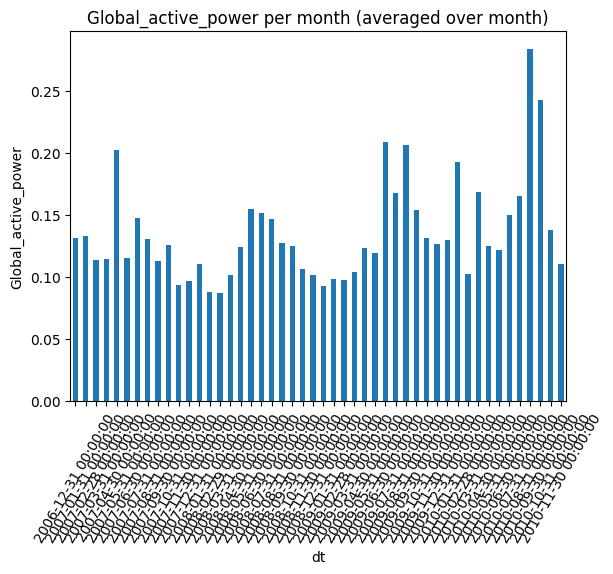

In [55]:
#global reactive power resampled over month
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()


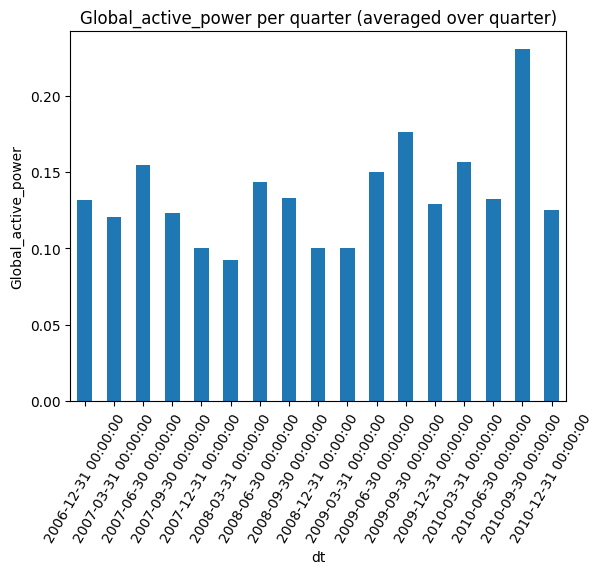

In [56]:
#Mean of 'Global_active_power' resampled over quarter
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

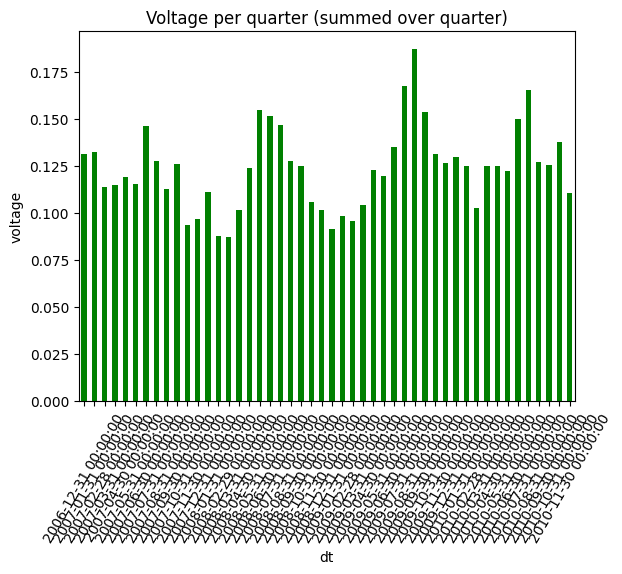

In [57]:
#mean of 'Voltage' resampled over month

df['Voltage'].resample('M').mean().plot(kind='bar',color='green')
plt.xticks(rotation=60)
plt.ylabel('voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()


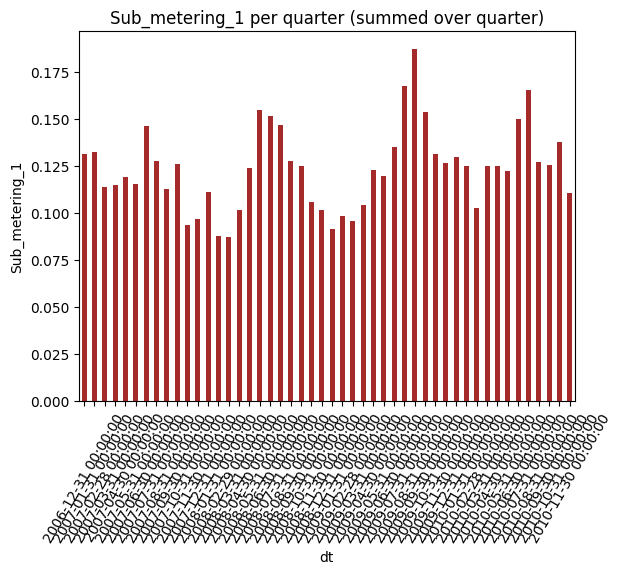

In [58]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

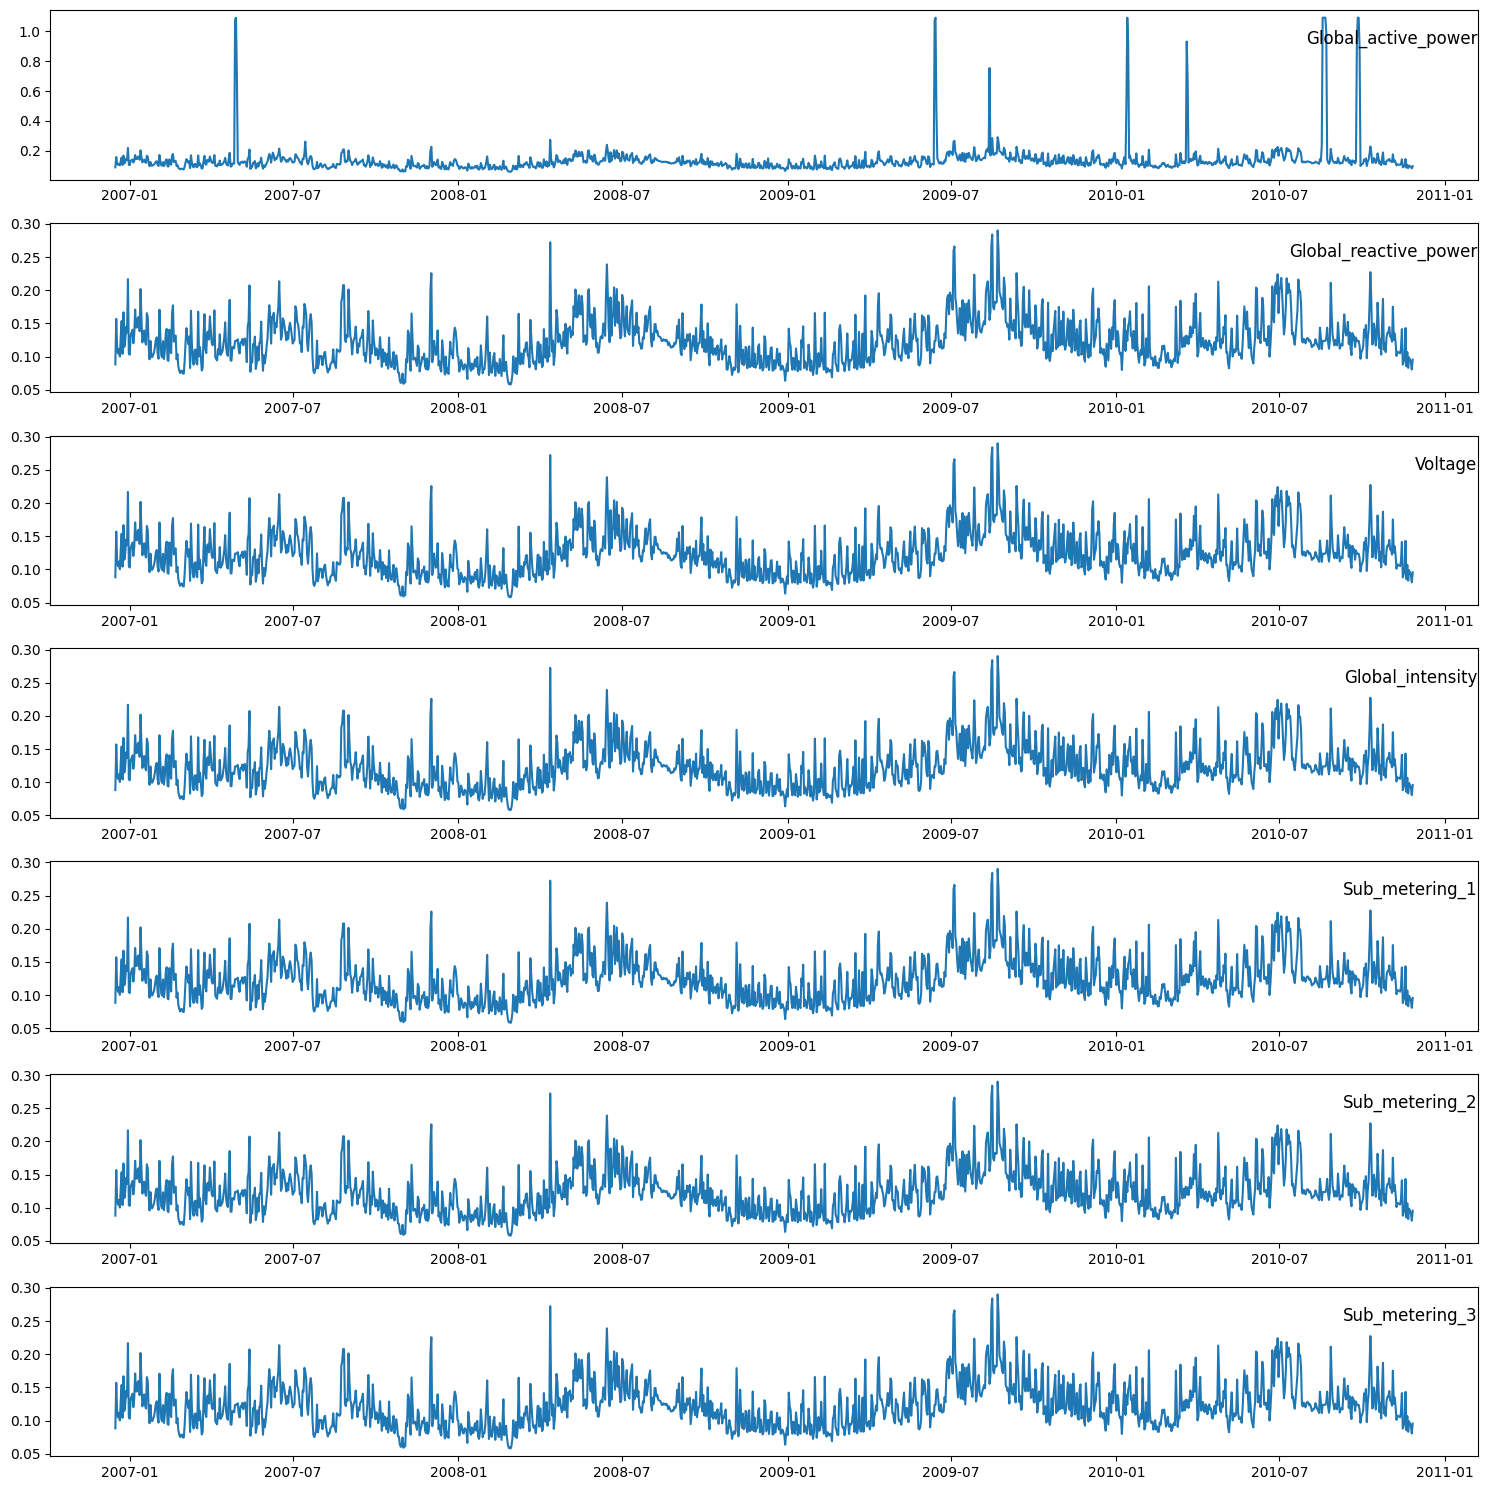

In [94]:
cols_to_plot = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]
dailymean=df.resample('D').mean()
plt.figure(figsize=(15,15))
#plot each specified column
for i ,col in enumerate(cols_to_plot,1):
    plt.subplot(len(cols_to_plot),1,i)
    plt.plot(daily_mean.index,daily_mean[col])
    plt.title(col,y=0.75,loc='right')
    
plt.tight_layout()
plt.show()

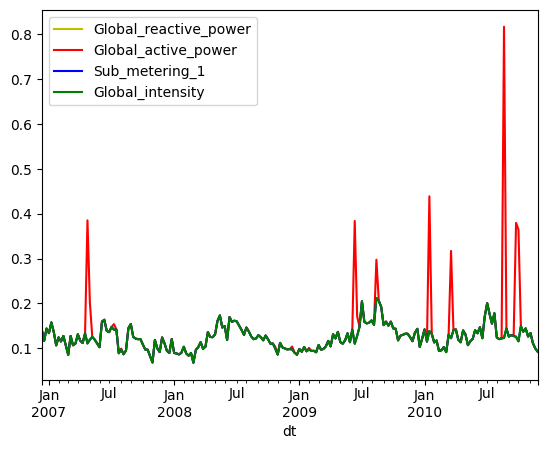

In [100]:
## resampling over week and computing mean
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

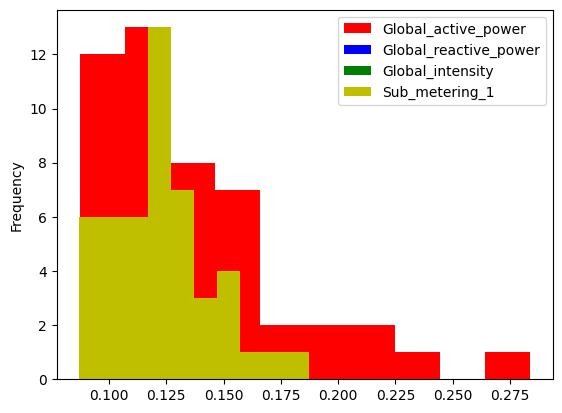

In [102]:
df.Global_active_power.resample('M').mean().plot(kind='hist',color='r',legend=True)
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b',legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist',color='g',legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()



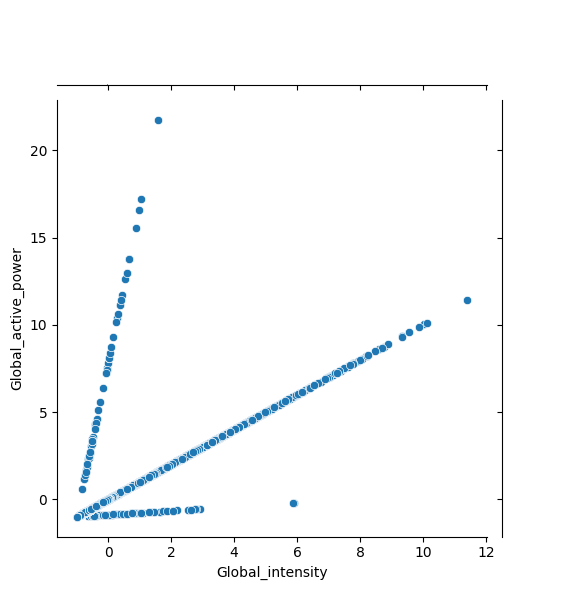

In [106]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

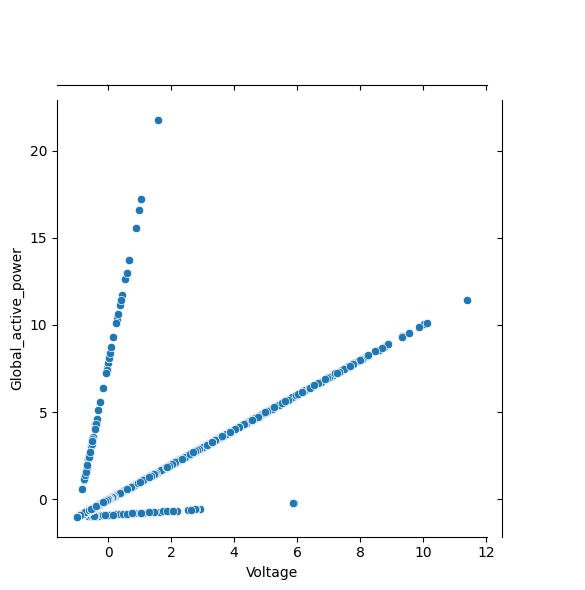

In [104]:
## The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

In [107]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,0.418,0.418,0.418,0.418,0.418,0.418,0.418
2006-12-16 17:25:00,0.436,0.436,0.436,0.436,0.436,0.436,0.436
2006-12-16 17:26:00,0.498,0.498,0.498,0.498,0.498,0.498,0.498
2006-12-16 17:27:00,0.502,0.502,0.502,0.502,0.502,0.502,0.502
2006-12-16 17:28:00,0.528,0.528,0.528,0.528,0.528,0.528,0.528
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2010-11-26 20:59:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2010-11-26 21:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [109]:
#energy analysis github refrence
path="C:\\Users\\prash\\Downloads\\individual+household+electric+power+consumption\\household_power_consumption.txt"

In [110]:
dtypes={'Date':str,
         'Time':str,
       'Global_active_power':float,
        'Global_reactive_power':float,
       'Voltage':float,
       'Global_intensity':float,
       'Sub_metering_1':float,
       'Sub_metering_2':float,
       'Sub_metering_3':float}

In [115]:
energy=pd.read_csv(path,sep=';',dtype=dtypes,na_values='?')
energy

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [119]:
energy=energy.sample(20000)

In [120]:
energy=energy.fillna(method='ffill')

In [128]:
#energy.insert(0,'Date_Time',pd.to_datetime(energy['Date']+" "+energy['Time']))
#energy.insert(2,'Year',energy['Date_Time'].dt.year)
energy.insert(3,'Month',energy['Date_Time'].dt.month)

In [131]:
energy.insert(4,'Day',energy['Date_Time'].dt.weekday)

In [133]:
energy.insert(5,'Hour',energy['Date_Time'].dt.hour)

In [134]:
energy

,Date_Time,Date,Year,Month,Day,Hour,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
855191,2008-01-08 14:35:00,1/8/2008,2008,1,1,14,14:35:00,0.304,0.232,240.65,1.6,0.0,0.0,0.0
1518769,2009-05-11 10:13:00,5/11/2009,2009,5,0,10,10:13:00,1.354,0.000,243.37,5.4,0.0,0.0,19.0
1625530,2010-01-18 13:34:00,18/1/2010,2010,1,0,13,13:34:00,1.398,0.000,246.13,5.6,0.0,0.0,20.0
1003812,2008-12-11 19:36:00,12/11/2008,2008,12,3,19,19:36:00,1.226,0.064,236.98,5.2,0.0,0.0,0.0
601784,2008-07-02 15:08:00,7/2/2008,2008,7,2,15,15:08:00,0.410,0.000,243.68,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821460,2008-09-07 04:24:00,9/7/2008,2008,9,6,4,04:24:00,0.338,0.260,240.11,1.8,0.0,2.0,1.0
138248,2007-03-22 17:32:00,22/3/2007,2007,3,3,17,17:32:00,1.466,0.208,241.56,6.0,0.0,0.0,18.0
729044,2008-06-05 00:08:00,6/5/2008,2008,6,3,0,00:08:00,0.396,0.084,241.84,1.8,0.0,0.0,0.0
1844687,2010-06-19 18:11:00,19/6/2010,2010,6,5,18,18:11:00,0.326,0.088,243.54,1.4,0.0,0.0,1.0


In [141]:
#overview of global_active_power distribution and how it behaves over time
np.round(energy['Global_active_power'].describe(),2).apply(lambda x:format(x,'f'))

count    20000.000000
mean         1.080000
std          1.050000
min          0.080000
25%          0.310000
50%          0.590000
75%          1.520000
max          8.890000
Name: Global_active_power, dtype: object

C:\Users\prash\AppData\Local\Temp\ipykernel_15916\1876139893.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(energy['Global_active_power'],color='blue',ax=axes[1,0])
C:\Users\prash\AppData\Local\Temp\ipykernel_15916\1876139893.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(energy['Glo

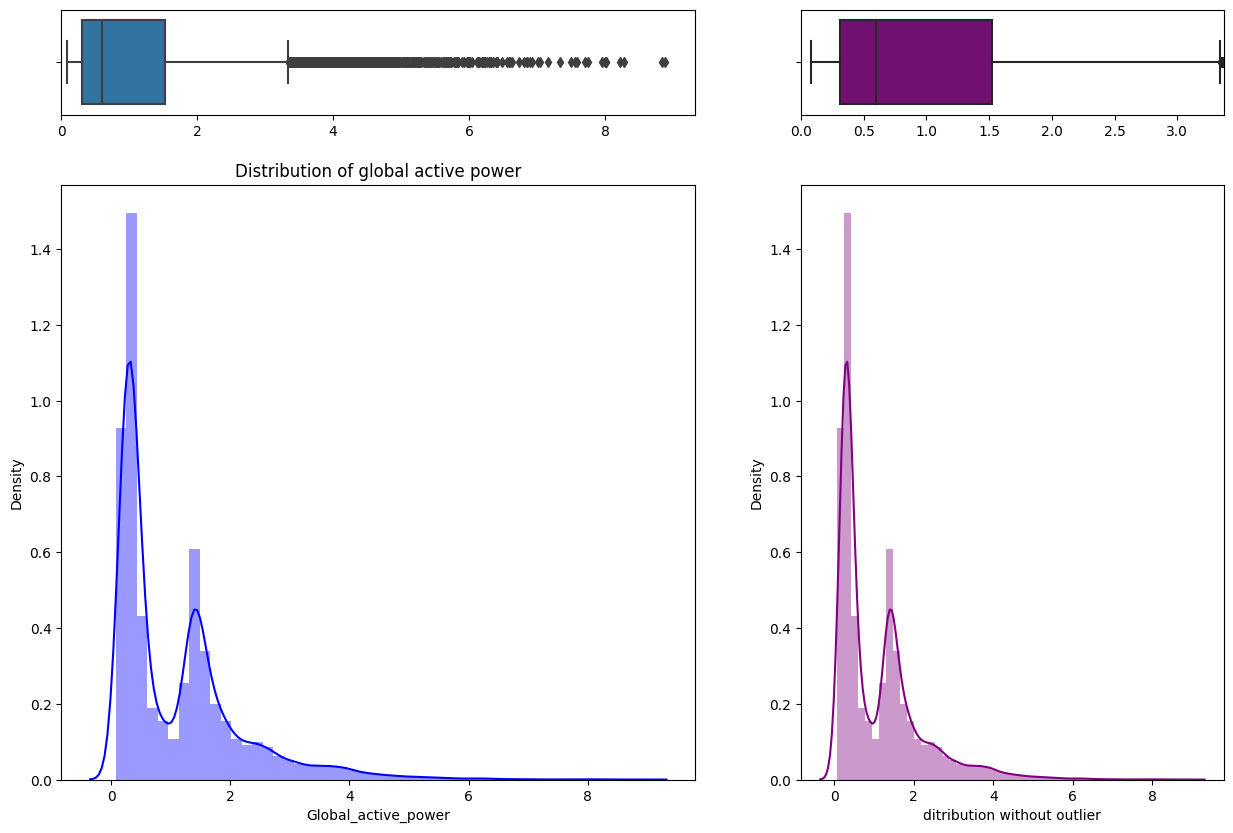

In [170]:
# Create subplots

f, axes = plt.subplots(2,
                       2, 
                       figsize=(15, 10), 
                       sharex=False, 
                       gridspec_kw={"height_ratios": (.15, .85),"width_ratios":(.60,.40)})
#Main boxplot
sns.boxplot(data=energy,x='Global_active_power',ax=axes[0,0])
axes[0,0].set_xlabel('')
axes[0,0].set_xlim(0,None)

#main distribution
sns.distplot(energy['Global_active_power'],color='blue',ax=axes[1,0])
axes[0,0].set_xlim(0,None)
axes[1,0].set_title('Distribution of global active power')

#zoom boxplot
sns.boxplot(data=energy,x='Global_active_power',color='purple',ax=axes[0,1])
axes[0,1].set_xlabel('')
axes[0,1].set_xlim(0,3.37)

#zoom distribution
sns.distplot(energy['Global_active_power'],color='purple',ax=axes[1,1])
axes[1,1].set_xlabel('ditribution without outlier')

plt.show()

In [176]:
energy

,Date_Time,Date,Year,Month,Day,Hour,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
855191,2008-01-08 14:35:00,1/8/2008,2008,1,1,14,14:35:00,0.304,0.232,240.65,1.6,0.0,0.0,0.0
1518769,2009-05-11 10:13:00,5/11/2009,2009,5,0,10,10:13:00,1.354,0.000,243.37,5.4,0.0,0.0,19.0
1625530,2010-01-18 13:34:00,18/1/2010,2010,1,0,13,13:34:00,1.398,0.000,246.13,5.6,0.0,0.0,20.0
1003812,2008-12-11 19:36:00,12/11/2008,2008,12,3,19,19:36:00,1.226,0.064,236.98,5.2,0.0,0.0,0.0
601784,2008-07-02 15:08:00,7/2/2008,2008,7,2,15,15:08:00,0.410,0.000,243.68,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821460,2008-09-07 04:24:00,9/7/2008,2008,9,6,4,04:24:00,0.338,0.260,240.11,1.8,0.0,2.0,1.0
138248,2007-03-22 17:32:00,22/3/2007,2007,3,3,17,17:32:00,1.466,0.208,241.56,6.0,0.0,0.0,18.0
729044,2008-06-05 00:08:00,6/5/2008,2008,6,3,0,00:08:00,0.396,0.084,241.84,1.8,0.0,0.0,0.0
1844687,2010-06-19 18:11:00,19/6/2010,2010,6,5,18,18:11:00,0.326,0.088,243.54,1.4,0.0,0.0,1.0


In [179]:
#linear regression
df=energy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [180]:
x=df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y=df['Global_active_power']

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()

In [182]:
model.fit(x_train,y_train)
ypred_linear=model.predict(x_test)

In [186]:
mse=mean_squared_error(y_test,ypred_linear)
mae = mean_absolute_error(y_test, ypred_linear)

mse,mae

(0.001587225164700785, 0.02542412924854633)

In [188]:
r2=r2_score(y_test,ypred_linear)
r2

0.9985288277905128

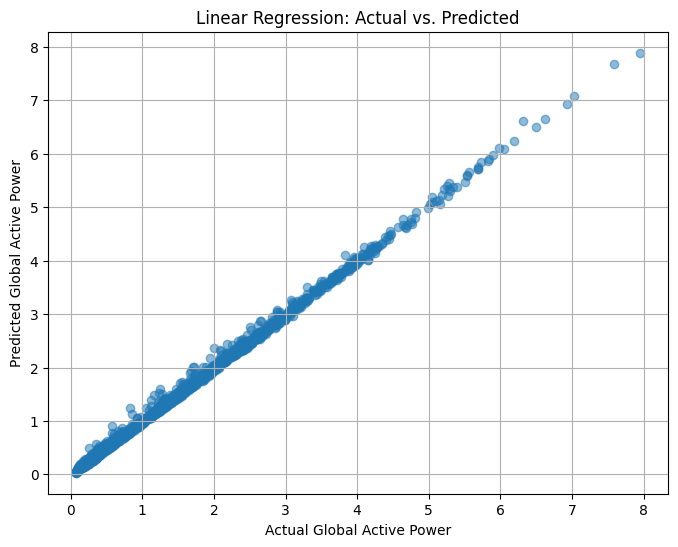

In [189]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ypred_linear, alpha=0.5)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.grid(True)
plt.show()


In [191]:
#creating ridge regression model with raining sets
from sklearn.linear_model import Ridge

alpha=1.0
model=Ridge(alpha=alpha)
model.fit(x_train,y_train)
y_pred_ridge=model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.03
R-squared (R2): 1.00


In [195]:
coefficients = model.coef_
coefficients

array([-1.80524427e-01,  4.44067927e-03,  2.38056476e-01, -2.03555752e-04,
       -3.69791970e-04,  2.22401711e-03])

In [196]:
#creating ridge regression model with raining sets
from sklearn.linear_model import Lasso

alpha=1.0
model=Lasso(alpha=alpha)
model.fit(x_train,y_train)
y_pred_ridge=model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.05
Mean Absolute Error (MAE): 0.17
R-squared (R2): 0.95


In [197]:
coefficients = model.coef_
coefficients

array([ 0.        , -0.        ,  0.17764407,  0.        ,  0.        ,
        0.00707566])

In [198]:
#elastic net regression
from sklearn.linear_model import ElasticNet

In [199]:
x = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']

In [200]:
alpha = 1.0  # You can adjust alpha based on your needs
l1_ratio = 0.5  # The balance between L1 (Lasso) and L2 (Ridge) regularization
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

In [203]:
elastic_net.fit(x_train, y_train)

# Make predictions on the test data
y_pred = elastic_net.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.10
R-squared (R2): 0.98


In [206]:
coefficients = elastic_net.coef_
intercept = elastic_net.intercept_
coefficients,   intercept

(array([ 0.        , -0.        ,  0.19788348,  0.        ,  0.        ,
         0.00748919]),
 0.12651163332155524)

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Elastic Net Regression: Actual vs. Predicted')
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.grid(True)
plt.show()


In [ ]:
#svm model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset into a pandas DataFrame 'df'

# Split the data into features (X) and the target variable (y)
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an SVR (Support Vector Regression) model
svr = SVR(kernel='linear')  # You can choose the kernel based on your data

# Fit the SVR model to the training data
svr.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('SVM Regression: Actual vs. Predicted')
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.grid(True)
plt.show()
